# Nama: Riefky Arif Ibrahim
# NPM: 1806194725
Tugas Pemodelan dan Pembelajaran Mesin: PCA

# Import Library
Impot library pandas untuk input data, matplotlib untuk plotting data ke grafik, numpy untuk perhitungan, dan scikit-learn untuk perhitungan PCA

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Upload data ke Google Collab
Dalam hal ini upload datasheet (.xlsx) yang telah ditentukan yaitu dataDiabetes yang telah diedit agar dapat diread oleh library.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataDiabetes-edited.xlsx to dataDiabetes-edited.xlsx


Data yang telah diupload akan memiliki tanpilan seperti berikut yakni sama dengan data yang ada pada excel.

In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['dataDiabetes-edited.xlsx']))
df

,preg,plas,pres,skin,insu,mass,pedi,age,test
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2288.000,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


# Melakukan Standardisasi data
PCA dipengaruhi oleh skala sehingga perlu mengskalakan fitur dalam data sebelum menerapkan PCA. Dalam hal ini saya menggunakan StandardScaler untuk membantu menstandarkan fitur set data ke dalam skala unit (mean = 0 dan variance = 1) yang merupakan persyaratan untuk mendapatkan performa optimal dari banyak algoritma pembelajaran mesin.

In [ ]:
features = ["preg", "plas", "pres", "skin","insu", "mass","pedi", "age"]
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['test']].values

In [ ]:
x = StandardScaler().fit_transform(x)

Tampilan data setelah distandardisasi akan seperti tabel berikut.

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,-0.247180,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.248022,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,-0.247042,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.248583,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,6.732917,-0.020496


# Proyeksi PCA ke 7D
Data asli memiliki 8 kolom (preg, plas, pres, skin, insu, mass, pedi, dan age). Pada bagian ini kode memproyeksikan data asli yang berukuran 8 dimensi menjadi 7 dimensi. Sebagai catatan bahwa setelah reduksi dimensi, biasanya tidak ada arti tertentu yang ditetapkan untuk setiap komponen utama. Komponen baru hanyalah 7 dimensi utama variasi.

In [ ]:
pca = PCA(n_components=7)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

Hasil Perhitungan PCA ditunjukkan seperti tabel berikut.
Disini hanya menampilkan 5 baris head untuk memudahkan visualisasi

In [ ]:
principalDf.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.005310,1.210467,-0.331520,-0.235190,0.132757,0.391250,0.901332
1,-1.142394,-0.665425,-0.642046,0.388189,0.419367,-0.392643,0.751401
2,-0.482707,1.756071,1.229794,-0.874042,-0.919296,-0.030526,-1.084927
3,-1.027463,-1.290801,-0.328302,0.087477,0.252657,-0.487737,-0.096006
4,1.952515,-1.863818,4.473317,4.439421,0.916568,1.934354,0.856796


Target yang akan kita analisis PCAnya adalah komponen y (test) yang mana terdiri dari 2 komponen yaitu tested_positive dan tested_negative

In [ ]:
df[['test']].head()

,test
0,tested_positive
1,tested_negative
2,tested_positive
3,tested_negative
4,tested_positive


# Visualisasi gabungan data PCA dan target
Menggabungkan DataFrame sepanjang sumbu = 1. finalDf adalah DataFrame terakhir sebelum memplot data.

In [ ]:
finalDf = pd.concat([principalDf, df[['test']]], axis = 1)
finalDf.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,test
0,1.005310,1.210467,-0.331520,-0.235190,0.132757,0.391250,0.901332,tested_positive
1,-1.142394,-0.665425,-0.642046,0.388189,0.419367,-0.392643,0.751401,tested_negative
2,-0.482707,1.756071,1.229794,-0.874042,-0.919296,-0.030526,-1.084927,tested_positive
3,-1.027463,-1.290801,-0.328302,0.087477,0.252657,-0.487737,-0.096006,tested_negative
4,1.952515,-1.863818,4.473317,4.439421,0.916568,1.934354,0.856796,tested_positive


Untuk mendapatkan Scree Plot maka harus mencetak variance dari tiap principal component

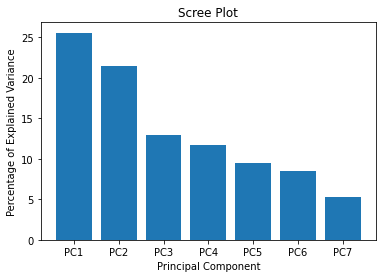

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.25564167, 0.21457189, 0.12923406, 0.11672116, 0.09501334,
       0.08539693, 0.05292289])

Varians yang dijelaskan menunjukkan bahwa berapa banyak informasi (varians) yang dapat dikaitkan ke masing-masing komponen utama. Hal ini penting karena meskipun kita dapat mengubah ruang 8 dimensi menjadi ruang 7 dimensi, hal itu dapat menyebabkan kehilangan sebagian varians (informasi) saat melakukannya. Dengan menggunakan atribut explained_varians_rasio_, kita dapat melihat bahwa komponen utama pertama berisi 25.56% varian, komponen utama kedua berisi 21.45% varian, ketiga berisi 12.92% varian, keempat berisi 11.67% varian, kelima berisi 9.5% varian, keenam berisi 8.53% varian, dan ketujuh berisi 5.29% varian. Bersama-sama, ketujuh komponen tersebut mengandung 94,92% informasi. Sehingga 1 komponen utama sisanya (kedelapan) mangandung sisa informasi yaitu 5.08% informasi.

# Detailed Information masing-masing PCA

In [ ]:
for i in range(0, 7):
    loading_scores = pd.Series(pca.components_[i], index=["preg", "plas", "pres", "skin","insu", "mass","pedi", "age"])
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    print("PC" + str(i+1))
    print(sorted_loading_scores)
    print("\n")

PC1
mass    0.451722
insu    0.419072
skin    0.418541
plas    0.412645
pres    0.391284
age     0.243447
pedi    0.178353
preg    0.175197
dtype: float64


PC2
age     0.606140
preg    0.582077
skin    0.380493
insu    0.295023
mass    0.152913
plas    0.136223
pres    0.135976
pedi    0.039224
dtype: float64


PC3
pedi    0.590701
plas    0.462821
pres    0.417641
mass    0.332971
insu    0.299811
skin    0.235484
preg    0.077286
age     0.016225
dtype: float64


PC4
pedi    0.769299
insu    0.394417
pres    0.343305
plas    0.336858
mass    0.121260
preg    0.064435
age     0.049173
skin    0.002961
dtype: float64


PC5
plas    0.518854
skin    0.480073
preg    0.468122
pres    0.312630
insu    0.281831
mass    0.263508
pedi    0.143286
age     0.118528
dtype: float64


PC6
mass    0.677235
pres    0.635332
insu    0.304076
preg    0.190247
plas    0.065914
pedi    0.064197
age     0.022559
skin    0.008639
dtype: float64


PC7
age     0.714587
preg    0.592557
skin    0.274748
pre

# Kesimpulan
Berdasarkan hasil PCA tersebut menunjukkan bahwa dengan hanya menggunakan 7 komponen PCA sudah didapatkan kekuatan 94.92% informasi sehingga tidak perlu mencari PC untuk data sisanya. Namun dalam hal ini jika menggunakan PC kurang dari 7 maka akan didapatkan nilai dibawah 90% sehingga data akan berkurang keakuratannya.